<h1>Importing Libraries & Data Loading</h1>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
autism_data = pd.read_csv("Toddler Autism dataset July 2018.csv")

<h2>Analyzing the Data</h2>

In [36]:
autism_data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [37]:
autism_data.tail()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No
1053,1054,1,1,0,0,1,1,0,1,1,0,24,6,m,asian,yes,yes,family member,Yes


In [38]:
# Problem Statement: Predicting Autism in Toddlers
# The goal of this project is to predict whether a toddler has autism or not based on the given features.
# In Dataset, 
# Case_No: Unique ID for each toddler
# A1: A1_Score is the result of autistic screening question 1
# A2: A2_Score is the result of autistic screening question 2
# Similarly, A3 to A10 are the results of other screening questions
# Age_Mons: Age in months
# Qchat_10 Score: Qchat_10_Score is the total score of the screening questions
# Sex is the gender of the toddler
# Ethnicity is from which place the toddler belongs
# Jaundice is whether the toddler had jaundice or not
# Family_mem_with_ASD is whether any family member has ASD or not
# Who completed the test
# Class/ASD Traits is whether the toddler has autism or not (1 for Yes, 0 for No)

In [39]:
autism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [40]:
# nunqiue is Pandas DataFrame method that returns the number of unique values in a column

autism_data.nunique()

Case_No                   1054
A1                           2
A2                           2
A3                           2
A4                           2
A5                           2
A6                           2
A7                           2
A8                           2
A9                           2
A10                          2
Age_Mons                    25
Qchat-10-Score              11
Sex                          2
Ethnicity                   11
Jaundice                     2
Family_mem_with_ASD          2
Who completed the test       5
Class/ASD Traits             2
dtype: int64

In [41]:
# Detecting Null Values
autism_data.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

<Axes: >

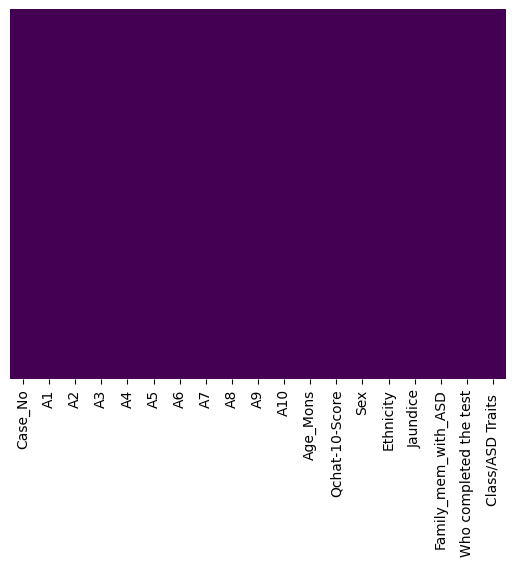

In [42]:
# Visualizing the missing data
sns.heatmap(autism_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
# Columns in the dataset
list(autism_data.columns)

['Case_No',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Age_Mons',
 'Qchat-10-Score',
 'Sex',
 'Ethnicity',
 'Jaundice',
 'Family_mem_with_ASD',
 'Who completed the test',
 'Class/ASD Traits ']

In [44]:
# Checking the duplicate values since Case_No is unique for each toddler
# The duplicated() method returns a boolean Series denoting duplicate rows.
# The sum() method returns the number of duplicate rows.
# autism_data.duplicated().sum() returns the number of duplicate rows in the dataset
autism_data.duplicated().sum()

0

In [45]:
# Dropping The Columns that are not needed for the analysis
# axis=1 means we are dropping the columns
autism_data.drop(['Case_No'],axis=1,inplace=True)

In [46]:
autism_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


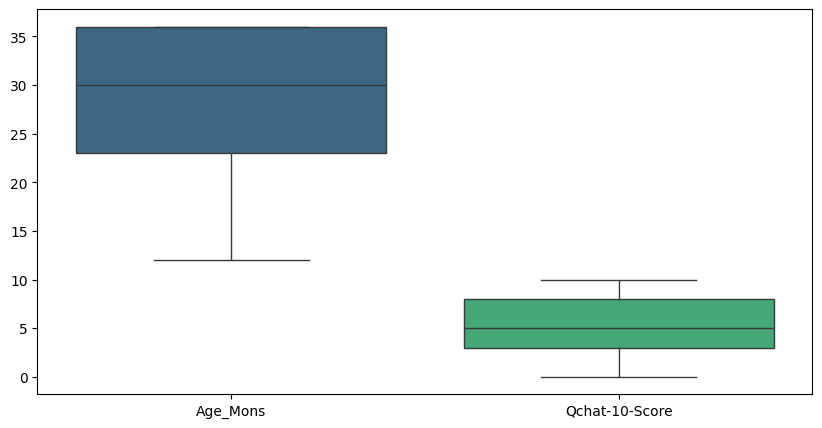

In [47]:
# Now Let's check for outliers in the data
# We will check for outliers in the numerical columns
# Age_Mons and Qchat_10_Score are the numerical columns
# We will use boxplot to check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=autism_data[['Age_Mons', 'Qchat-10-Score']], palette='viridis')
plt.show()
# Outliers means the data points that are significantly different from other data points in the dataset
# From the boxplot, we can see that there are no outliers in the data as there are no points outside the whiskers
# Whiskers are the lines that extend from the box to the highest and lowest values that are not outliers
# The points outside the whiskers are considered as outliers
# This shows that there are no outliers in the data

In [48]:
# Checking for outliers using IQR
# Creating a function named count_outliers_iqr that takes a column as input and returns the number of outliers in the column
def count_outliers_iqr(column):
    # The IQR (Interquartile Range) is the range between the first quartile (Q1) and the third quartile (Q3)
    # The IQR is used to identify outliers in the data
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    # The upper threshold is calculated as Q3 + 1.5 * IQR
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    # The number of outliers is calculated as the number of data points that are greater than the upperbound or less than the lowerbound
    num_outliers = sum((column > upper_bound) | (column < lower_bound))
    return num_outliers

for col in ['Age_Mons', 'Qchat-10-Score' , 'A1' , 'A2' , 'A3' , 'A4' , 'A5' , 'A6' , 'A7' , 'A8' , 'A9' , 'A10']:
    num_outliers = count_outliers_iqr(autism_data[col])
    print(f"Number of outliers in {col} : {num_outliers}")

# Since there are no outliers in the data, we can proceed with the analysis as there are no data points that are significantly different from other data points making the data consistent and reliable.

Number of outliers in Age_Mons : 0
Number of outliers in Qchat-10-Score : 0
Number of outliers in A1 : 0
Number of outliers in A2 : 0
Number of outliers in A3 : 0
Number of outliers in A4 : 0
Number of outliers in A5 : 0
Number of outliers in A6 : 0
Number of outliers in A7 : 0
Number of outliers in A8 : 0
Number of outliers in A9 : 0
Number of outliers in A10 : 0


In [49]:
# Let's check the distribution of the columns in the dataset
# cat_cols contains the names of the categorical columns
# num_cols contains the names of the numerical columns
# select_dtypes method is used to select the columns based on the data types
# select_dtypes(include=['object']) selects the columns that are of object data type i.e. categorical columns
# select_dtypes(include=np.number) selects the columns that are of numerical data type i.e. numerical columns
cat_cols=autism_data.select_dtypes(include=['object']).columns.tolist()
# .tolist() is used to convert the columns into a list
num_cols = autism_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print()
print(cat_cols)
print()
print("Numerical Variables:")
print()
print(num_cols)

Categorical Variables:

['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits ']

Numerical Variables:

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score']


In [50]:
autism_data.dtypes

# int64 is the numerical data type
# object is the categorical data type

A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
Class/ASD Traits          object
dtype: object

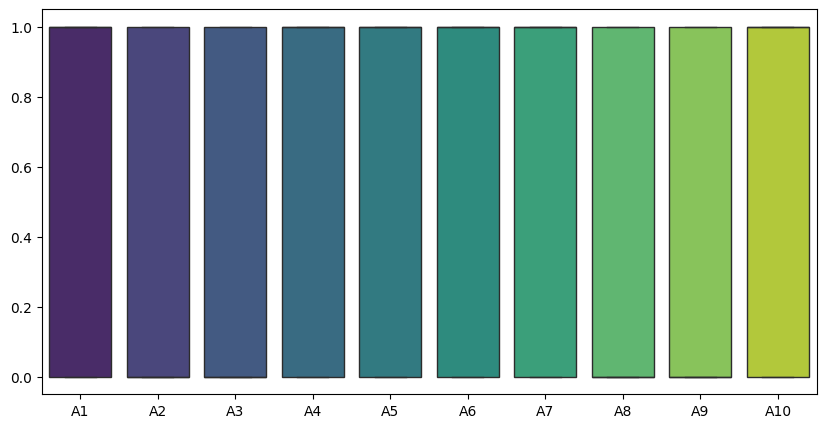

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=autism_data[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']], palette='viridis')
plt.show()

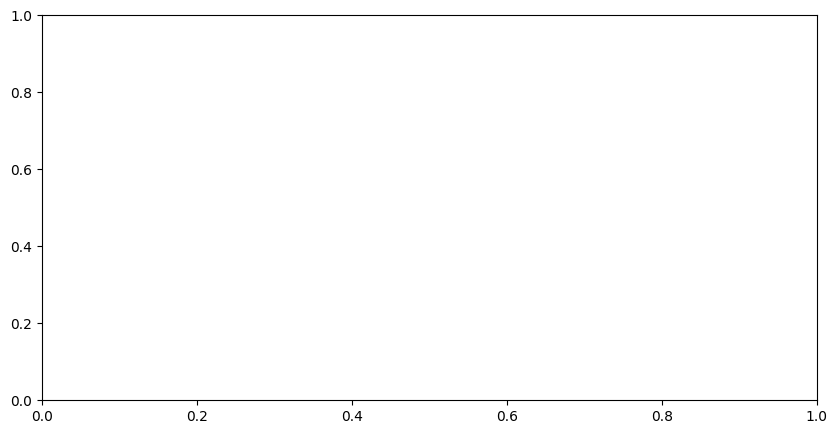

In [52]:
plt.figure(figsize=(10, 5))
# Nothing is showing because the data is categorical
sns.boxplot(data=autism_data[['Sex', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits ']], palette='viridis')
plt.show()

In [53]:
# Ethnicity unique values
autism_data['Ethnicity'].value_counts()

Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64

In [54]:
autism_data.describe()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [55]:
autism_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


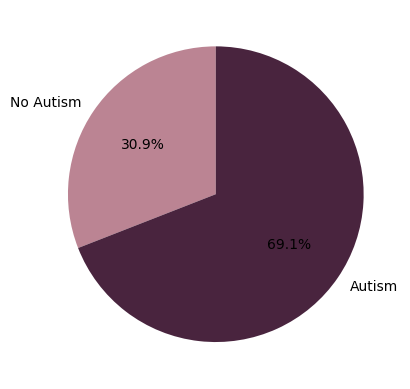

In [56]:
plt.pie(autism_data.groupby('Class/ASD Traits ').size(), labels=['No Autism', 'Autism'], autopct='%1.1f%%', startangle=90, colors=['#BB8493','#49243E'])
plt.show()

In [57]:
# Now Let's Check if their Family member has ASD or not

autism_data['Family_mem_with_ASD'].value_counts()

Family_mem_with_ASD
no     884
yes    170
Name: count, dtype: int64

In [58]:
autism_data.shape

(1054, 18)

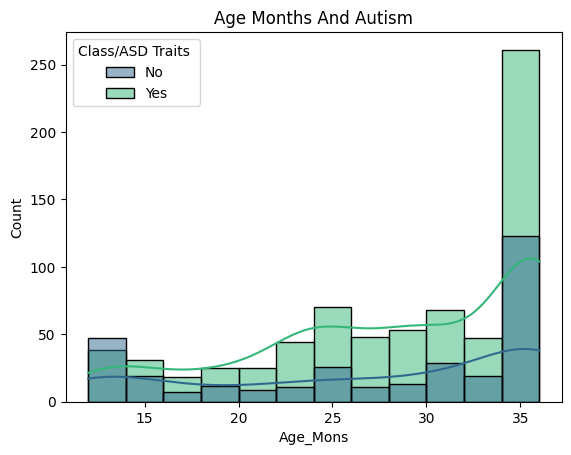

In [59]:
# Age Months And Autism Visualization
# plt.figure(figsize=(10, 5))
# kde=True means we are plotting the density curve
# density curve is the smoothed version of the histogram
# x-axis is the Age_Mons and y-axis is the count of the toddlers
# hue is the Class/ASD Traits column
# palette is the color of the plot
# The plot shows how many toddlers have autism and how many don't have autism at each age
sns.histplot(data=autism_data, x='Age_Mons', hue='Class/ASD Traits ', kde=True, palette='viridis')
plt.title('Age Months And Autism')
plt.show()

In [60]:
autism_data['Qchat-10-Score'].value_counts()

Qchat-10-Score
7     135
5     120
4     110
8      97
3      96
6      96
9      95
2      88
1      88
10     75
0      54
Name: count, dtype: int64

In [61]:
list(autism_data['Qchat-10-Score'].value_counts().keys())

[7, 5, 4, 8, 3, 6, 9, 2, 1, 10, 0]

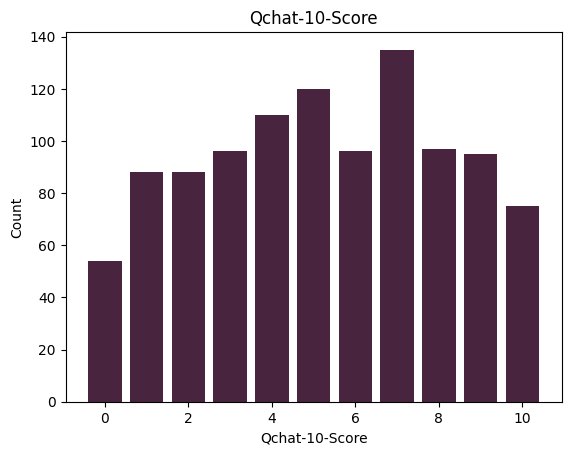

In [62]:
plt.bar(list(autism_data['Qchat-10-Score'].value_counts().keys()), list(autism_data['Qchat-10-Score'].value_counts()), color='#49243E')
plt.xlabel('Qchat-10-Score')
plt.ylabel('Count')
plt.title('Qchat-10-Score')
plt.show()

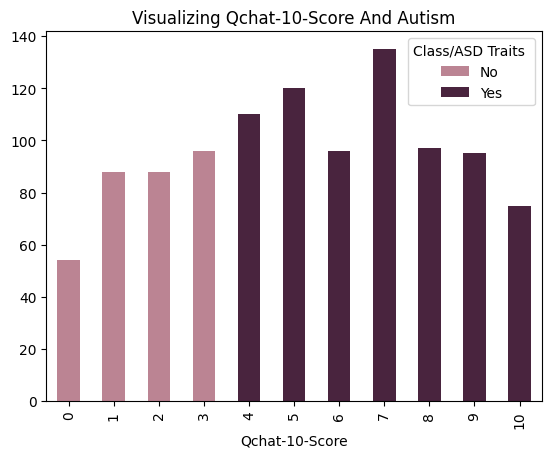

In [63]:
# Qchat-10-Score And Autism Visualization
# plt.figure(figsize=(10, 5))
autism_data.groupby('Qchat-10-Score')['Class/ASD Traits '].value_counts().unstack().plot(kind='bar', stacked=True, color=['#BB8493','#49243E'])
plt.title('Visualizing Qchat-10-Score And Autism')
plt.show()

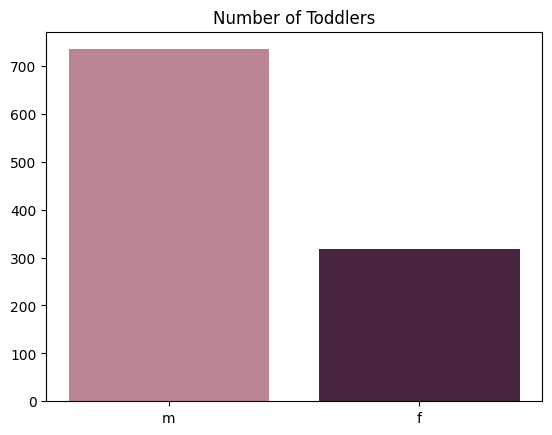

In [64]:
# Sex Visualization
# plt.figure(figsize=(10, 5))
plt.bar(list(autism_data['Sex'].value_counts().keys()), list(autism_data['Sex'].value_counts()), color= ['#BB8493','#49243E'])
plt.title("Number of Toddlers")
plt.show()

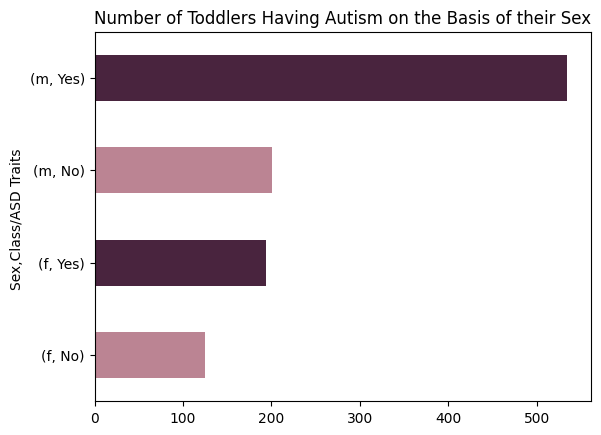

In [65]:
autism_data.groupby(['Sex', 'Class/ASD Traits ']).size().plot(kind='barh', color=['#BB8493','#49243E'])
plt.title('Number of Toddlers Having Autism on the Basis of their Sex')
plt.show()

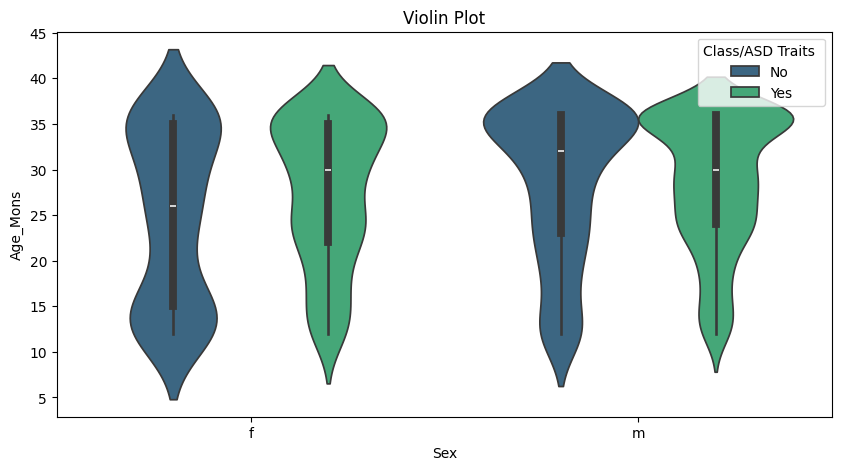

In [66]:
# Violin Plot
plt.figure(figsize=(10, 5))
sns.violinplot(x= "Sex", y= "Age_Mons", data=autism_data, hue= "Class/ASD Traits ", palette='viridis')
plt.title('Violin Plot')
plt.show()

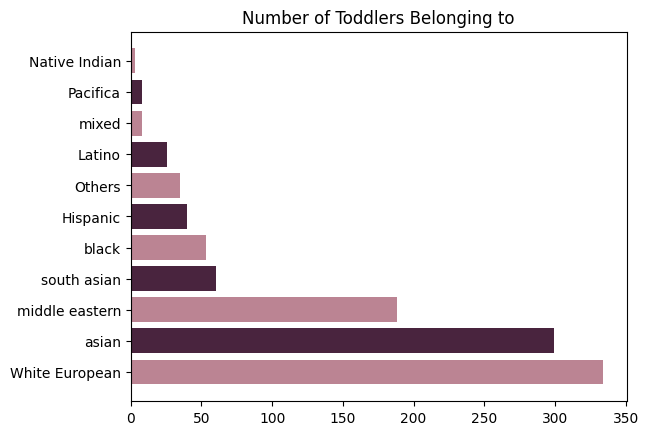

In [67]:
# Ethnicity Visualization
# plt.figure(figsize=(10, 5))
plt.barh(list(autism_data['Ethnicity'].value_counts().keys()), list(autism_data['Ethnicity'].value_counts()), color= ['#BB8493','#49243E'])
plt.title("Number of Toddlers Belonging to")
plt.show()

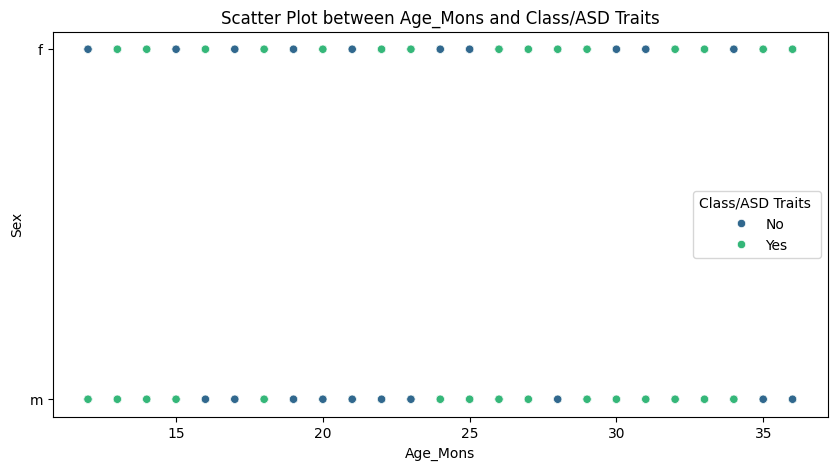

In [68]:
# Scatter Plot between Age_Mons and Class/ASD Traits
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age_Mons', y='Sex', data=autism_data, hue='Class/ASD Traits ', palette='viridis')
plt.title('Scatter Plot between Age_Mons and Class/ASD Traits')
plt.show()

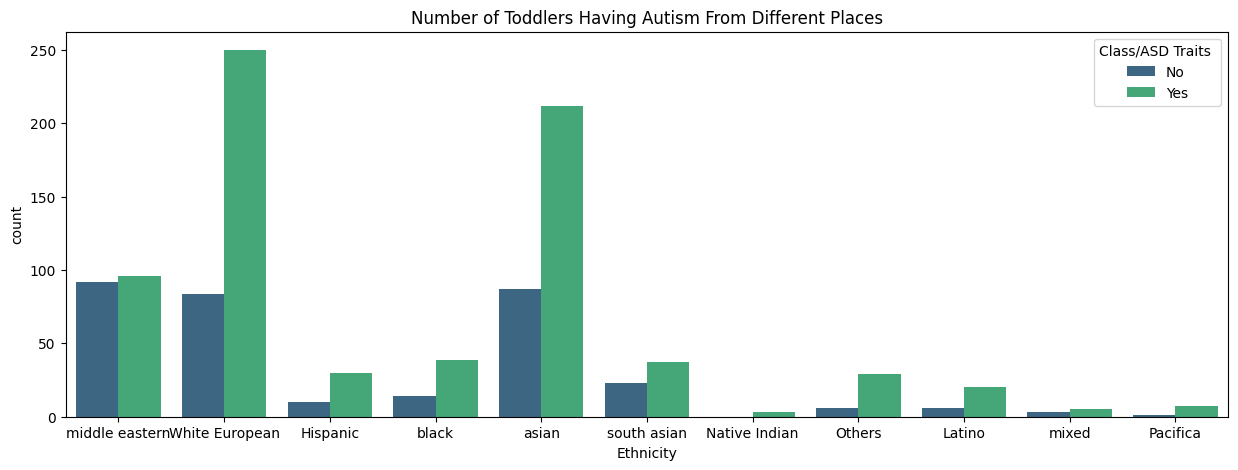

In [69]:
# Ehenicity and Autism Visualization
plt.figure(figsize=(15, 5))
sns.countplot(data=autism_data, x='Ethnicity', hue='Class/ASD Traits ', palette='viridis')
plt.title('Number of Toddlers Having Autism From Different Places')
plt.show()

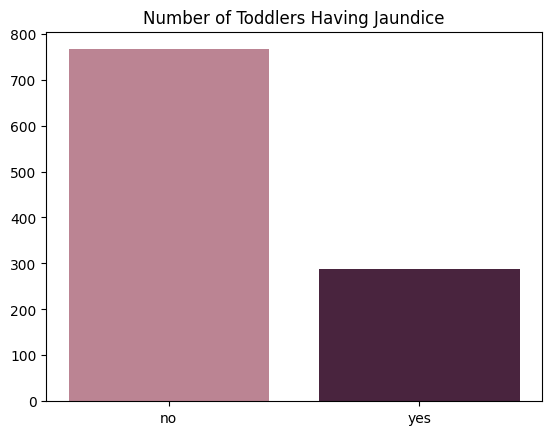

In [70]:
# Jaundice Visualization
plt.bar(list(autism_data['Jaundice'].value_counts().keys()), list(autism_data['Jaundice'].value_counts()), color= ['#BB8493','#49243E'])
plt.title('Number of Toddlers Having Jaundice')
plt.show()

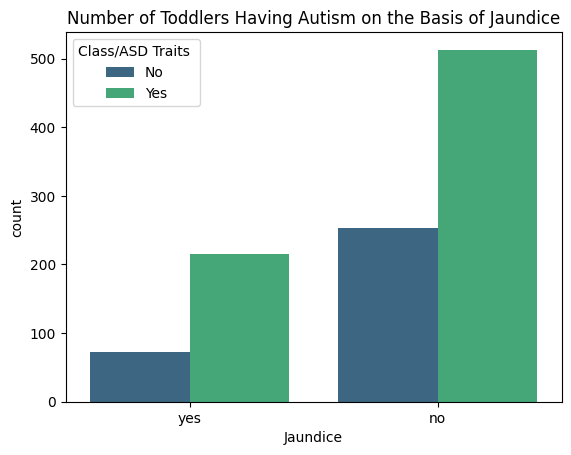

In [71]:
sns.countplot(data=autism_data, x='Jaundice', hue='Class/ASD Traits ', palette= 'viridis')
plt.title('Number of Toddlers Having Autism on the Basis of Jaundice')
plt.show()

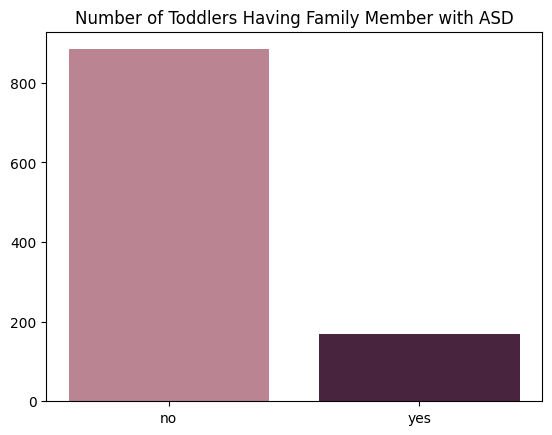

In [72]:
# Family_mem_with_ASD Visualization
plt.bar(list(autism_data['Family_mem_with_ASD'].value_counts().keys()), list(autism_data['Family_mem_with_ASD'].value_counts()), color= ['#BB8493','#49243E'])
plt.title('Number of Toddlers Having Family Member with ASD')
plt.show()

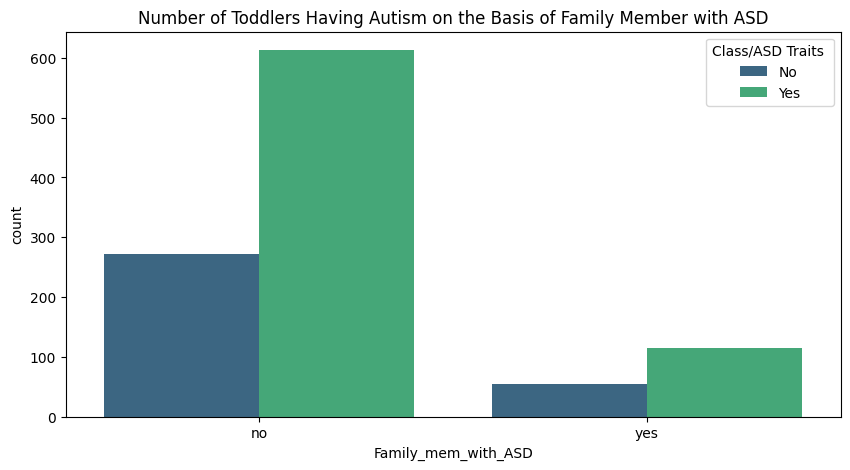

In [73]:
# Family_mem_with_ASD and Autism Visualization
plt.figure(figsize=(10, 5))
sns.countplot(data=autism_data, x='Family_mem_with_ASD', hue='Class/ASD Traits ', palette='viridis')
plt.title('Number of Toddlers Having Autism on the Basis of Family Member with ASD')
plt.show()

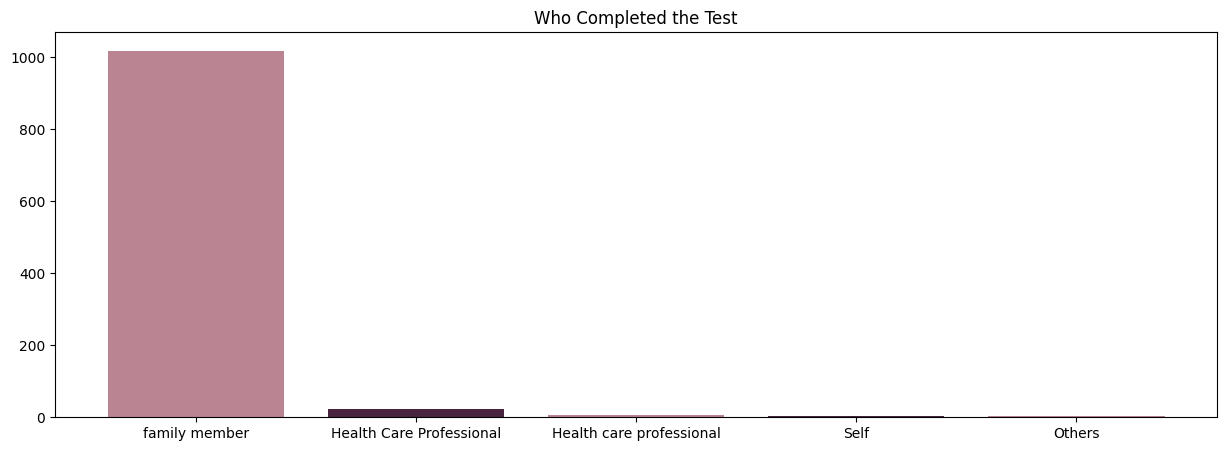

In [74]:
# Who completed the test Visualization
plt.figure(figsize=(15, 5))
plt.bar(list(autism_data['Who completed the test'].value_counts().keys()), list(autism_data['Who completed the test'].value_counts()), color= ['#BB8493','#49243E'])
plt.title('Who Completed the Test')
plt.show()

In [75]:
# Pairplot
# Pairplot is used to plot pairwise relationships in a dataset
sns.pairplot(autism_data, hue='Class/ASD Traits ', palette='viridis')

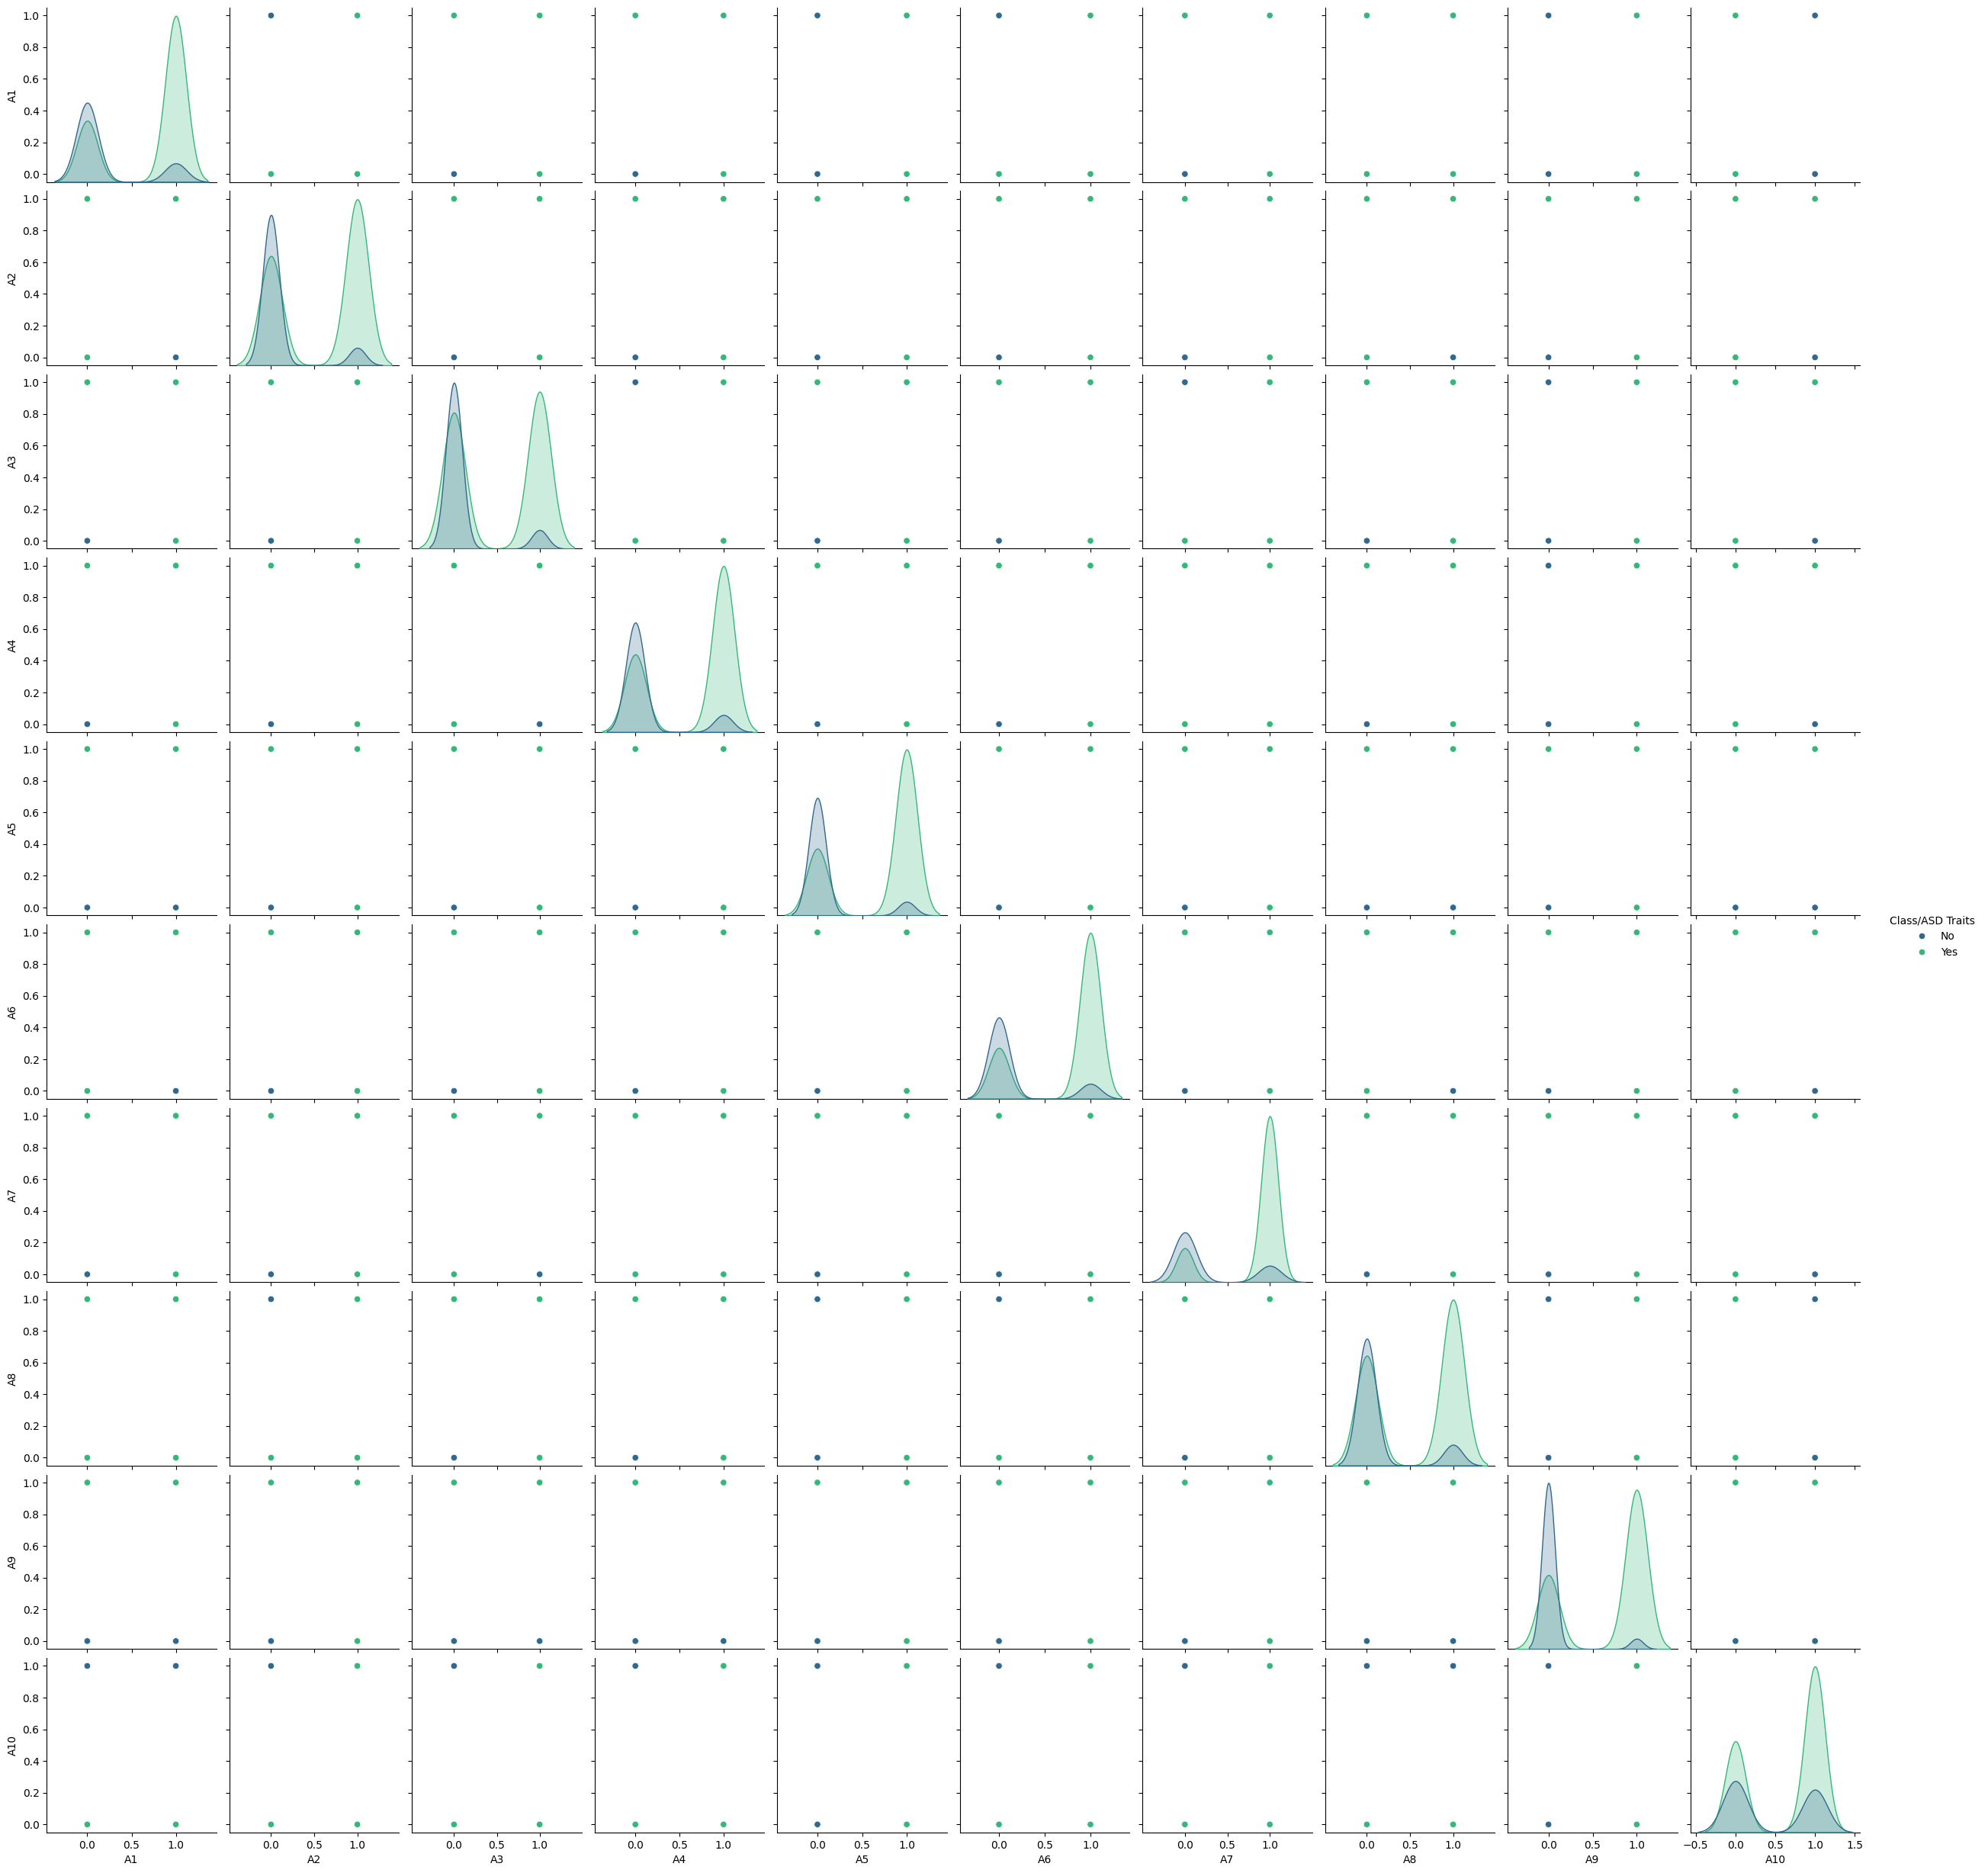

In [ ]:
sns.pairplot(autism_data[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Class/ASD Traits ']], hue='Class/ASD Traits ', palette='viridis')

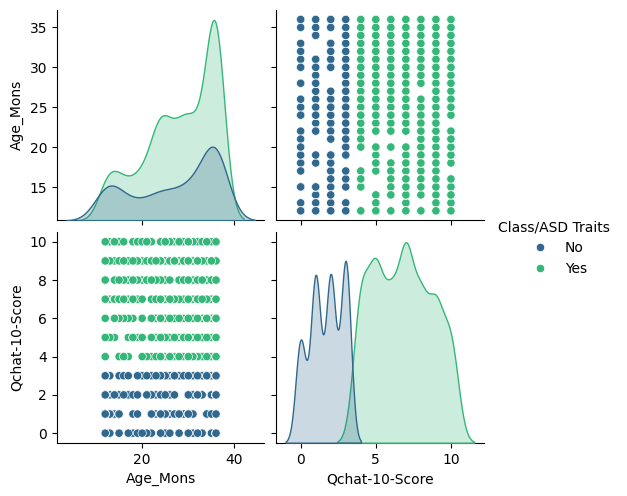

In [ ]:
sns.pairplot(autism_data[['Age_Mons', 'Qchat-10-Score', 'Class/ASD Traits ']], hue='Class/ASD Traits ', palette='viridis')

In [ ]:
cross_tab = pd.crosstab(index=autism_data['Age_Mons'], columns=autism_data['Class/ASD Traits '])

cross_tab

Class/ASD Traits,No,Yes
Age_Mons,,
12,37,30
13,10,8
14,3,16
15,16,15
16,2,11
17,5,7
18,4,12
19,8,13
20,4,17


<Axes: xlabel='Class/ASD Traits ', ylabel='Age_Mons'>

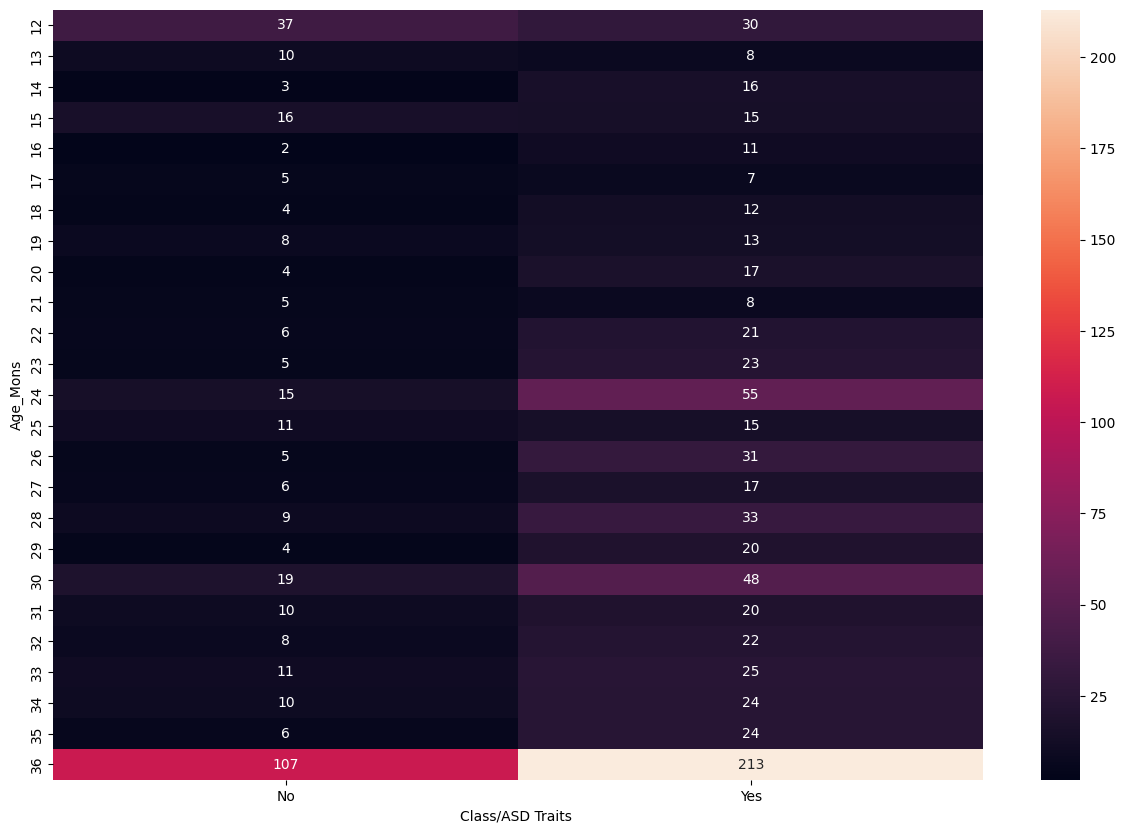

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(cross_tab, annot=True, fmt='d')

<Axes: xlabel='Class/ASD Traits ', ylabel='Qchat-10-Score'>

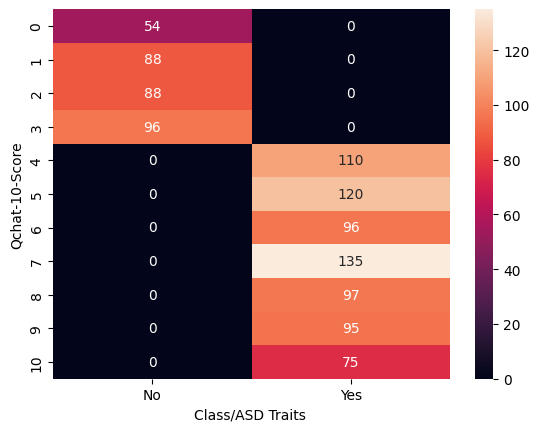

In [ ]:
cross_tab = pd.crosstab(index=autism_data['Qchat-10-Score'], columns=autism_data['Class/ASD Traits '])

sns.heatmap(cross_tab, annot=True, fmt='d')

<Axes: xlabel='Class/ASD Traits ', ylabel='Sex'>

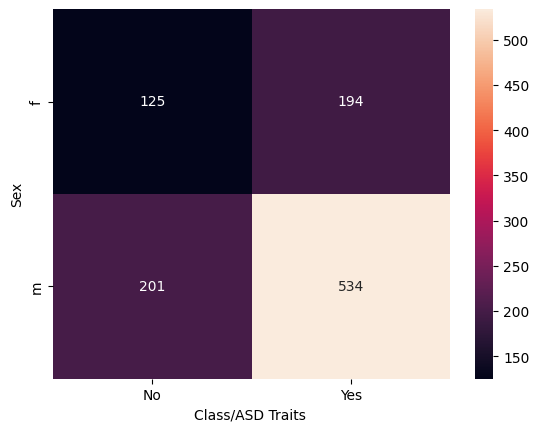

In [ ]:
cross_tab = pd.crosstab(index=autism_data['Sex'], columns=autism_data['Class/ASD Traits '])

sns.heatmap(cross_tab, annot=True, fmt='d')

<Axes: xlabel='Class/ASD Traits ', ylabel='Ethnicity'>

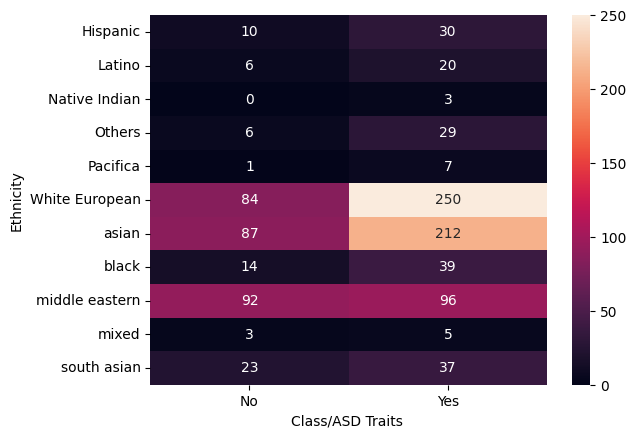

In [ ]:
cross_tab = pd.crosstab(index=autism_data['Ethnicity'], columns=autism_data['Class/ASD Traits '])

sns.heatmap(cross_tab, annot=True, fmt='d')

<Axes: xlabel='Class/ASD Traits ', ylabel='Jaundice'>

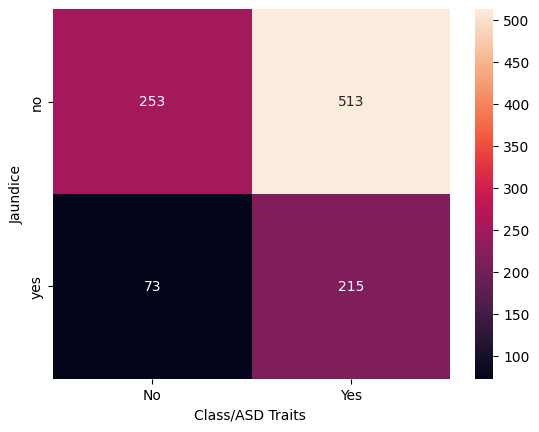

In [ ]:
cross_tab = pd.crosstab(index=autism_data['Jaundice'], columns=autism_data['Class/ASD Traits '])

sns.heatmap(cross_tab, annot=True, fmt='d')

<Axes: xlabel='Class/ASD Traits ', ylabel='Family_mem_with_ASD'>

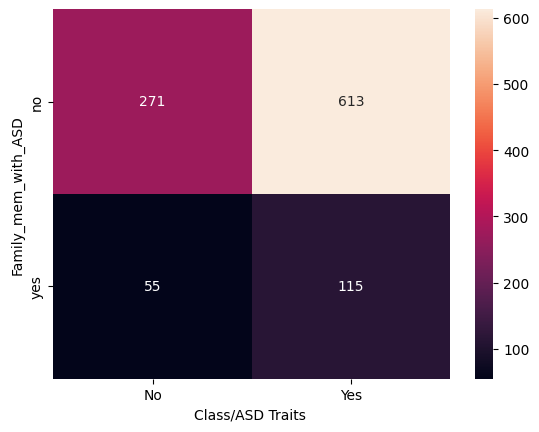

In [ ]:
cross_tab = pd.crosstab(index=autism_data['Family_mem_with_ASD'], columns=autism_data['Class/ASD Traits '])

sns.heatmap(cross_tab, annot=True, fmt='d')

<Axes: >

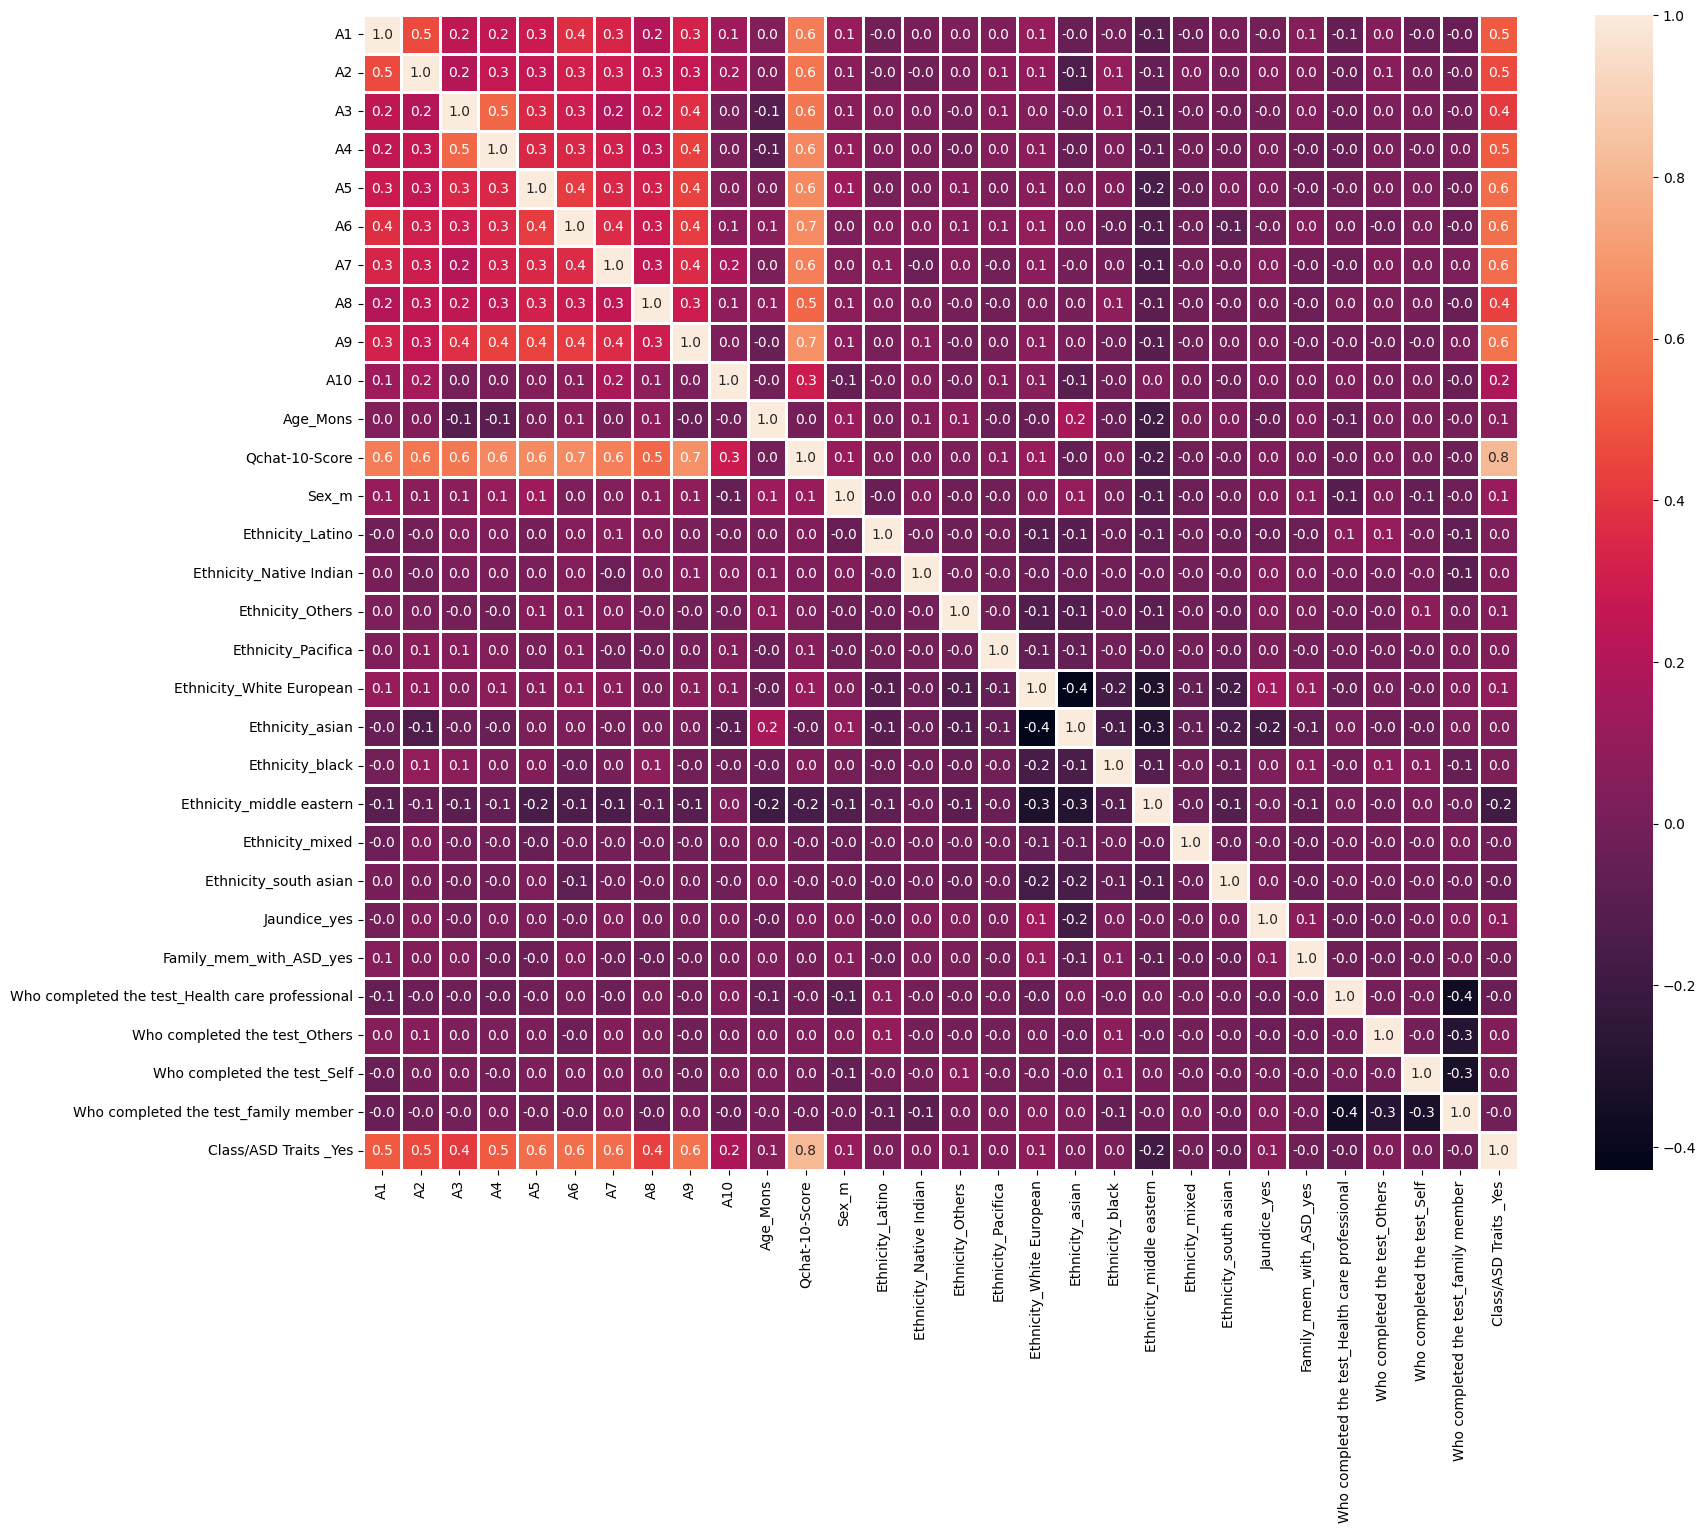

In [ ]:
# Correlation Matrix for full Dataset
autism_data = pd.get_dummies(autism_data, drop_first=True)
correlation_matrix = autism_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f' , square=True, linewidths=1)

In [ ]:
# Feature Engineering
# Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

def convertAge(age):
    if age <= 12:
        return '0-12 months'
    elif age > 12 and age <= 24:
        return '13-24 months'
    elif age > 24 and age <= 36:
        return '25-36 months'
    elif age > 36 and age <= 48:
        return '37-48 months' 

autism_data['Age_Group'] = autism_data['Age_Mons'].apply(convertAge)

In [ ]:
autism_data['Age_Group'].value_counts()

Age_Group
25-36 months    698
13-24 months    289
0-12 months      67
Name: count, dtype: int64

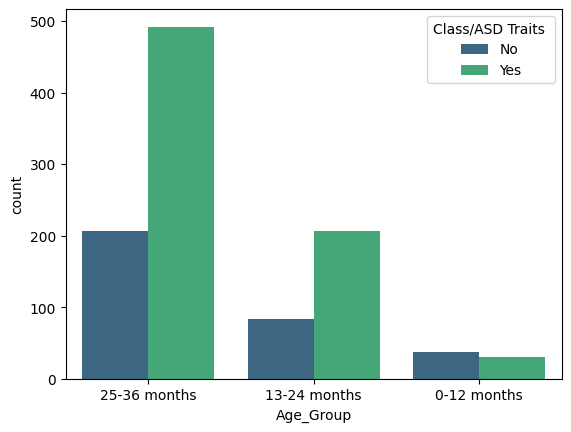

In [ ]:
sns.countplot(data=autism_data, x='Age_Group', hue='Class/ASD Traits ', palette='viridis')
plt.show()

In [ ]:
# Lowest Possible Age for Autism : 0 - 12 months
# Highest Possible Age for Autism : 37 - 48 months

# Encoding Categoircal Columns
# Encoding is the process of converting the categorical data into numerical data
autism_data['Jaundice'] = autism_data['Jaundice'].map({'yes': 1, 'no': 0})
autism_data['Family_mem_with_ASD'] = autism_data['Family_mem_with_ASD'].map({'yes': 1, 'no': 0})
autism_data[ 'Class/ASD Traits '] = autism_data['Class/ASD Traits '].map({'yes' : 1 , 'no' : 0})


autism_data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age_Group
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,NaN,NaN,family member,NaN,25-36 months
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,NaN,NaN,family member,NaN,25-36 months
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,NaN,NaN,family member,NaN,25-36 months
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,NaN,NaN,family member,NaN,13-24 months
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,NaN,NaN,family member,NaN,13-24 months
